In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [8]:

Train=pd.read_csv(r'G:\train.csv')
Test=pd.read_csv(r'G:\test.csv')


In [9]:
Test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [10]:
Test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [11]:
print("shape: Test dataset  ", Test.shape)


shape: Test dataset   (367, 12)


In [12]:
Train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [13]:
print(" shape: Train dataset ", Train.shape)


 shape: Train dataset  (614, 13)


In [14]:
print("Null values in Train dataset")
Train.isnull().sum()

Null values in Train dataset


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
Train["Gender"].fillna(Train["Gender"].mode()[0],inplace=True)
Train["Married"].fillna(Train["Married"].mode()[0],inplace=True)
Train['Dependents'].fillna(Train["Dependents"].mode()[0],inplace=True)
Train["Self_Employed"].fillna(Train["Self_Employed"].mode()[0],inplace=True)
Train["Credit_History"].fillna(Train["Credit_History"].mode()[0],inplace=True)

In [16]:
Train["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [18]:
Train["Loan_Amount_Term"].fillna(Train["Loan_Amount_Term"].mode()[0],inplace=True)
Train["Loan_Amount_Term"].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [19]:
Train["LoanAmount"].fillna(Train["LoanAmount"].median(),inplace=True)

In [15]:
Train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
print("Null values in Train data set")
Train.isnull().sum()

Null values in Train data set


Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
Test["Gender"].fillna(Test["Gender"].mode()[0],inplace=True)
Test['Dependents'].fillna(Test["Dependents"].mode()[0],inplace=True)
Test["Self_Employed"].fillna(Test["Self_Employed"].mode()[0],inplace=True)
Test["Loan_Amount_Term"].fillna(Test["Loan_Amount_Term"].mode()[0],inplace=True)
Test["Credit_History"].fillna(Test["Credit_History"].mode()[0],inplace=True)
Test["LoanAmount"].fillna(Test["LoanAmount"].median(),inplace=True)

In [18]:
print("Null values in Test data set")
Test.isnull().sum()

Null values in Test data set


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [19]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [20]:
Test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         367 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      367 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [21]:
print("Encoding categrical variable")  
Train_encoded = pd.get_dummies(Train,drop_first=True)
Train_encoded.head()

Encoding categrical variable


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_ID_LP001003,Loan_ID_LP001005,Loan_ID_LP001006,Loan_ID_LP001008,Loan_ID_LP001011,...,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,5849,0.0,NaN,360.0,1.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
1,4583,1508.0,128.0,360.0,1.0,1,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,0,1,0,0,0,...,1,1,0,0,0,0,1,0,1,1
3,2583,2358.0,120.0,360.0,1.0,0,0,1,0,0,...,1,1,0,0,0,1,0,0,1,1
4,6000,0.0,141.0,360.0,1.0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,1


In [22]:
print("Split data Features and Target Varible")
X = Train_encoded.drop(columns='Loan_Status_Y')
y = Train_encoded['Loan_Status_Y']

Split data Features and Target Varible


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score
from sklearn import tree
import numpy as np
from sklearn.metrics import confusion_matrix

In [24]:

print("Splitting into train and test Data")

X_Train,X_Test,y_Train,y_Test = train_test_split(X,y,test_size=0.2,stratify =y,random_state =42)

Splitting into train and test Data


In [25]:
print("handling Missing values")
impute = SimpleImputer(strategy='mean')
impute_Train = impute.fit(X_Train)
X_Train = impute_Train.transform(X_Train)
X_Test_imp = impute_Train.transform(X_Test)

handling Missing values


In [26]:
treeclassifier = DecisionTreeClassifier()
treeclassifier.fit(X_Train,y_Train)
y_predict = treeclassifier.predict(X_Train)
print("Training Data Set Accuracy: ", accuracy_score(y_Train,y_predict))
print("Training Data F1 Score ", f1_score(y_Train,y_predict))

print("Validation Mean F1 Score: ",cross_val_score(treeclassifier,X_Train,y_Train,cv=5,scoring='f1_macro').mean())
print("Validation Mean Accuracy: ",cross_val_score(treeclassifier,X_Train,y_Train,cv=5,scoring='accuracy').mean())

Training Data Set Accuracy:  1.0
Training Data F1 Score  1.0
Validation Mean F1 Score:  0.6951348516933926
Validation Mean Accuracy:  0.7270459699031129


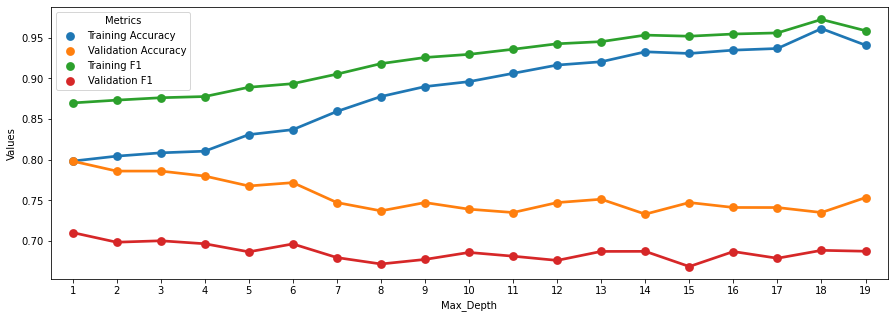

In [27]:
validation_accuracy = []
training_accuracy = []
training_f1 = []
validation_f1 = []
tree_depths = []

for depth in range(1,20):
    treeclassifier = DecisionTreeClassifier(max_depth=depth)
    treeclassifier.fit(X_Train,y_Train)
    y_Training_pred = treeclassifier.predict(X_Train)

    Training_acc = accuracy_score(y_Train,y_Training_pred)
    Train_f1 = f1_score(y_Train,y_Training_pred)
    val_mean_f1 = cross_val_score(treeclassifier,X_Train,y_Train,cv=5,scoring='f1_macro').mean()
    val_mean_accuracy = cross_val_score(treeclassifier,X_Train,y_Train,cv=5,scoring='accuracy').mean()
    
    training_accuracy.append(Training_acc)
    validation_accuracy.append(val_mean_accuracy)
    training_f1.append(Train_f1)
    validation_f1.append(val_mean_f1)
    tree_depths.append(depth)
    

Tuning_Max_depth = {"Training Accuracy": training_accuracy, "Validation Accuracy": validation_accuracy, "Training F1": training_f1, "Validation F1":validation_f1, "Max_Depth": tree_depths }
Tuning_Max_depth_df = pd.DataFrame.from_dict(Tuning_Max_depth)

plot_df = Tuning_Max_depth_df.melt('Max_Depth',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Max_Depth", y="Values",hue="Metrics", data=plot_df,ax=ax)

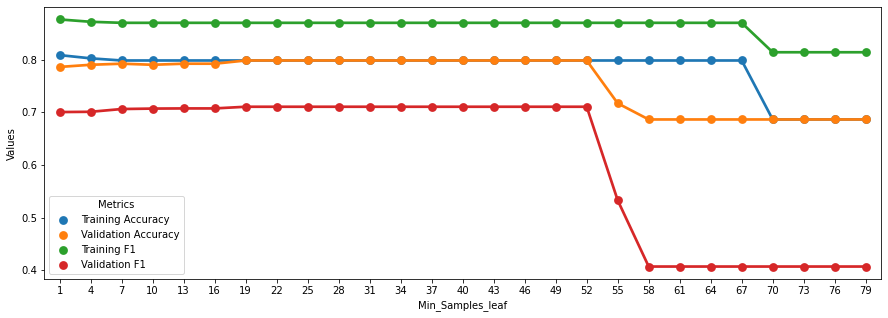

In [29]:
training_accuracy = []
validation_accuracy = []
training_f1 = []
validation_f1 = []
min_samples_leaf = []

for samples_leaf in range(1,80,3): 
    treeclassifier = DecisionTreeClassifier(max_depth=3,min_samples_leaf = samples_leaf)
    treeclassifier.fit(X_Train,y_Train)
    y_Training_pred = treeclassifier.predict(X_Train)

    Training_acc = accuracy_score(y_Train,y_Training_pred)
    Train_f1 = f1_score(y_Train,y_Training_pred)
    val_mean_f1 = cross_val_score(treeclassifier,X_Train,y_Train,cv=5,scoring='f1_macro').mean()
    val_mean_accuracy = cross_val_score(treeclassifier,X_Train,y_Train,cv=5,scoring='accuracy').mean()
    
    training_accuracy.append(Training_acc)
    validation_accuracy.append(val_mean_accuracy)
    training_f1.append(Train_f1)
    validation_f1.append(val_mean_f1)
    min_samples_leaf.append(samples_leaf)
    

Tuning_min_samples_leaf = {"Training Accuracy": training_accuracy, "Validation Accuracy": validation_accuracy, "Training F1": training_f1, "Validation F1":validation_f1, "Min_Samples_leaf": min_samples_leaf }
Tuning_min_samples_leaf_df = pd.DataFrame.from_dict(Tuning_min_samples_leaf)

plot_df = Tuning_min_samples_leaf_df.melt('Min_Samples_leaf',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Min_Samples_leaf", y="Values",hue="Metrics", data=plot_df,ax=ax)

In [33]:

treeclassifier = DecisionTreeClassifier(max_depth=3,min_samples_leaf = 35)
treeclassifier.fit(X_Train,y_Train)
y_predict = treeclassifier.predict(X_Test_imp)
print("Test Accuracy: ",accuracy_score(y_Test,y_predict))
print("Test F1 Score: ",f1_score(y_Test,y_predict))
print("Confusion Matrix on Test Data")
pd.crosstab(y_Test, y_predict, rownames=['True'], colnames=['Predicted'], margins=True)

Test Accuracy:  0.8536585365853658
Test F1 Score:  0.903225806451613
Confusion Matrix on Test Data


Predicted,0,1,All
True,,,
0,21,17,38
1,1,84,85
All,22,101,123
